## NAME - SARTHAK MODAK
## REG NO. 21BRS1218


### Data Preprocessing

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as py
import plotly.graph_objs as go
from sklearn.cluster import KMeans
import warnings
import os

In [39]:
df = pd.read_csv('/content/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.shape

(200, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [38]:
df.Spending.nunique()

SyntaxError: ignored

In [9]:
df.Age.unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41])

In [10]:
df.Age.value_counts()

32    11
35     9
19     8
31     8
30     7
49     7
40     6
38     6
47     6
27     6
36     6
23     6
34     5
20     5
29     5
50     5
48     5
21     5
24     4
18     4
28     4
67     4
59     4
54     4
43     3
60     3
45     3
39     3
33     3
37     3
22     3
25     3
46     3
68     3
52     2
44     2
66     2
57     2
26     2
53     2
42     2
63     2
70     2
51     2
58     2
65     2
41     2
55     1
69     1
64     1
56     1
Name: Age, dtype: int64

In [11]:
df.corr()

<ipython-input-11-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,1.000000,-0.026763,0.977548,0.013835
Age,-0.026763,1.000000,-0.012398,-0.327227
Annual Income (k$),0.977548,-0.012398,1.000000,0.009903
Spending Score (1-100),0.013835,-0.327227,0.009903,1.000000


In [12]:
df.corr().Age.sort_values(ascending =False)

<ipython-input-12-7408ab7b8e79>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr().Age.sort_values(ascending =False)


Age                       1.000000
Annual Income (k$)       -0.012398
CustomerID               -0.026763
Spending Score (1-100)   -0.327227
Name: Age, dtype: float64

<ipython-input-13-b2378c9d8a20>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age)


<Axes: xlabel='Age', ylabel='Density'>

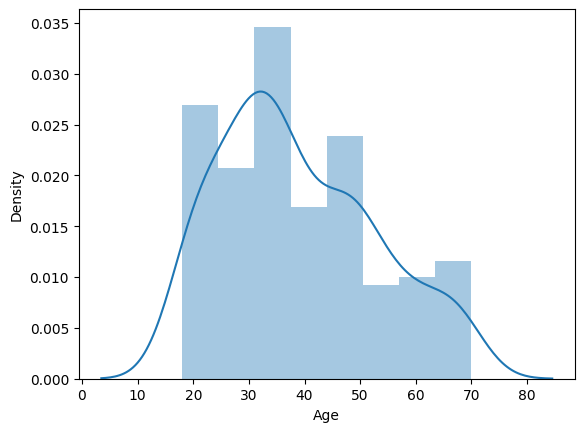

In [13]:
sns.distplot(df.Age)

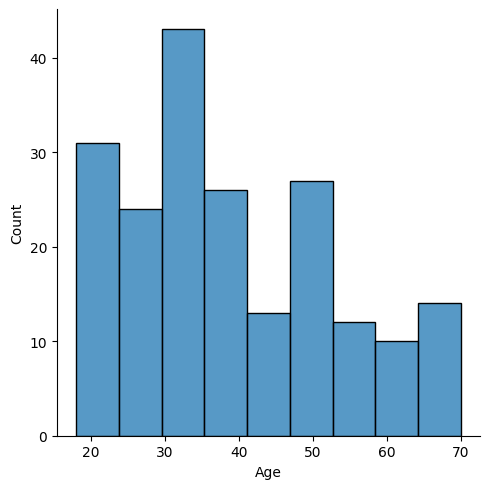

In [14]:
sns.displot(df.Age)

<Axes: ylabel='Age'>

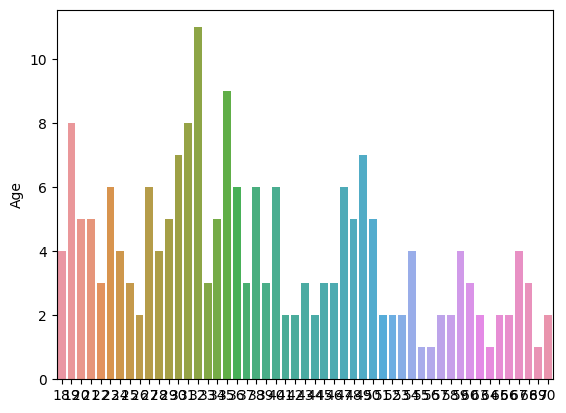

In [17]:
sns.barplot(x =df.Age.value_counts().index,y =df.Age.value_counts() )

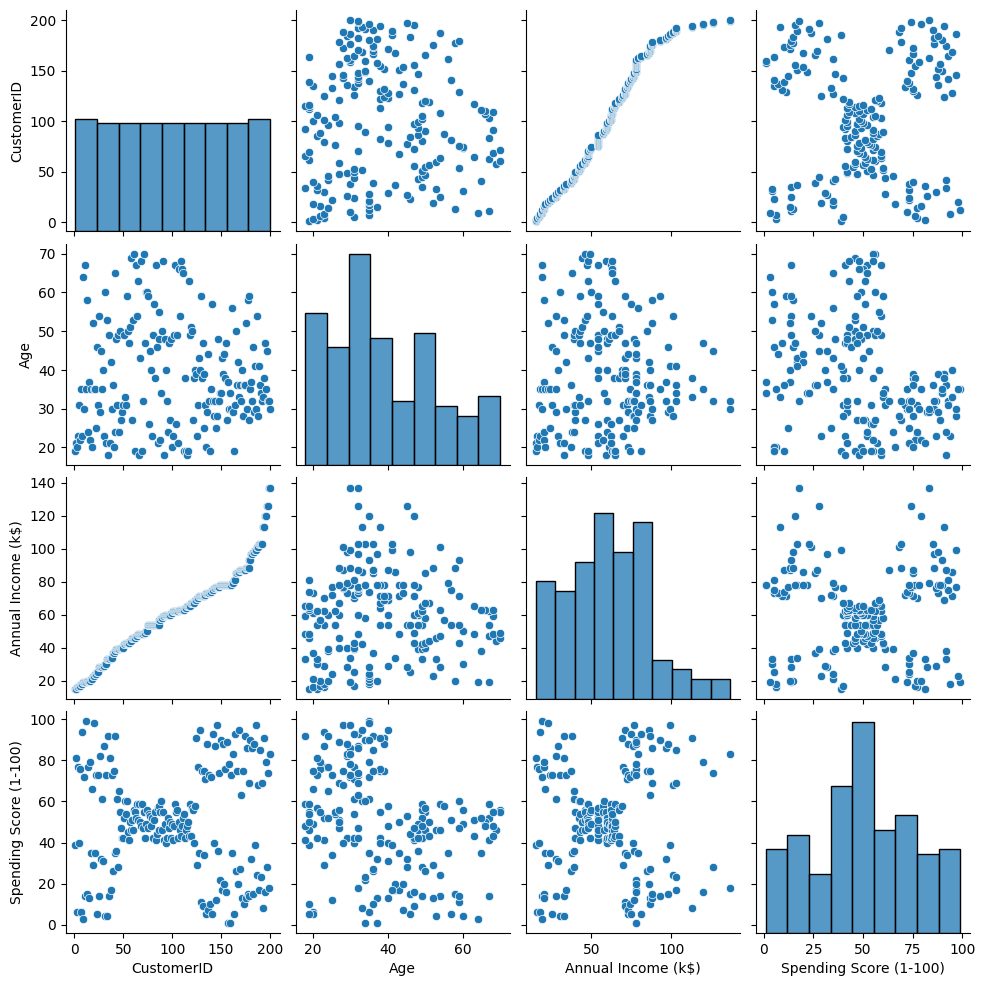

In [18]:
sns.pairplot(df)

<ipython-input-19-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

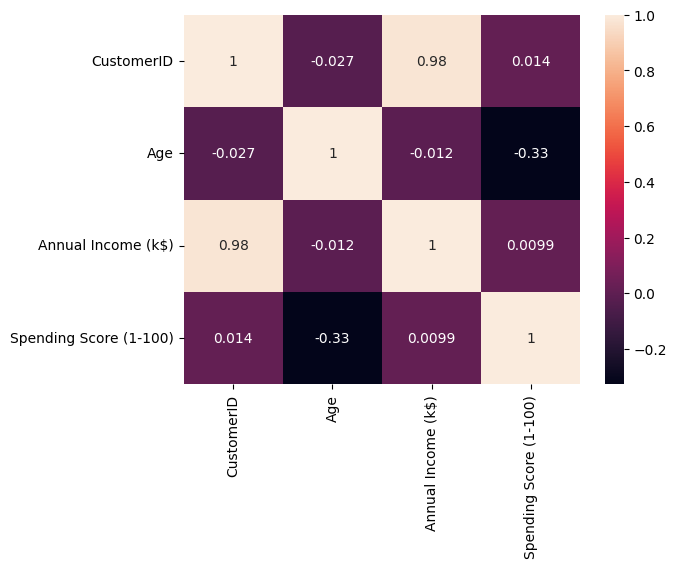

In [19]:
sns.heatmap(df.corr(),annot=True)

<Axes: >

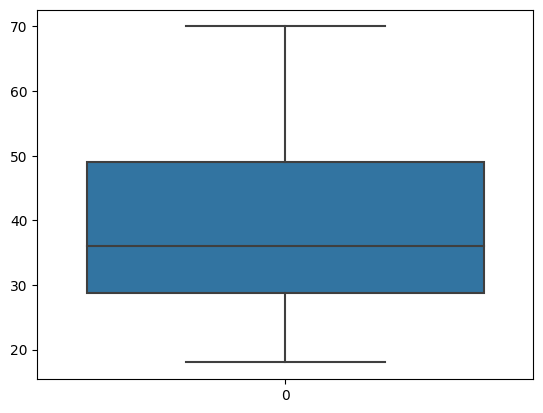

In [20]:
sns.boxplot(df.Age)

In [21]:
from sklearn.preprocessing import LabelEncoder

In [22]:
le = LabelEncoder()

In [23]:
df.Age = le.fit_transform(df.Age)

In [24]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,1,15,39
1,2,Male,3,15,81
2,3,Female,2,16,6
3,4,Female,5,16,77
4,5,Female,13,17,40


In [25]:
df_main = pd.get_dummies(df,columns =['Age'])
df_main.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,...,Age_41,Age_42,Age_43,Age_44,Age_45,Age_46,Age_47,Age_48,Age_49,Age_50
0,1,Male,15,39,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Male,15,81,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Female,16,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Female,16,77,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Female,17,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
df_main.corr()

<ipython-input-26-b764c75a6398>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_main.corr()


,CustomerID,Annual Income (k$),Spending Score (1-100),Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,Age_6,...,Age_41,Age_42,Age_43,Age_44,Age_45,Age_46,Age_47,Age_48,Age_49,Age_50
CustomerID,1.000000,0.977548,0.013835,-0.058767,-0.012375,-0.114547,-0.133962,-0.136440,-0.129966,-0.126194,...,0.021651,-0.087991,-0.016538,-0.112347,-0.042650,0.013926,-0.087841,-0.023868,-0.052183,-0.060058
Annual Income (k$),0.977548,1.000000,0.009903,-0.050765,-0.027737,-0.115884,-0.132997,-0.137665,-0.127942,-0.116199,...,0.025574,-0.081142,-0.015575,-0.112451,-0.038592,0.009360,-0.082119,-0.018339,-0.044807,-0.050100
Spending Score (1-100),0.013835,0.009903,1.000000,0.054350,-0.082810,-0.062164,0.103193,0.094856,0.089665,0.118128,...,-0.095390,-0.066431,-0.012485,-0.129894,-0.026141,-0.004682,-0.048250,-0.007346,-0.011558,0.020679
Age_0,-0.058767,-0.050765,0.054350,1.000000,-0.029161,-0.022875,-0.022875,-0.017629,-0.025123,-0.020408,...,-0.020408,-0.017629,-0.014358,-0.010127,-0.014358,-0.014358,-0.020408,-0.017629,-0.010127,-0.014358
Age_1,-0.012375,-0.027737,-0.082810,-0.029161,1.000000,-0.032686,-0.032686,-0.025190,-0.035898,-0.029161,...,-0.029161,-0.025190,-0.020515,-0.014470,-0.020515,-0.020515,-0.029161,-0.025190,-0.014470,-0.020515
Age_2,-0.114547,-0.115884,-0.062164,-0.022875,-0.032686,1.000000,-0.025641,-0.019760,-0.028161,-0.022875,...,-0.022875,-0.019760,-0.016093,-0.011351,-0.016093,-0.016093,-0.022875,-0.019760,-0.011351,-0.016093
Age_3,-0.133962,-0.132997,0.103193,-0.022875,-0.032686,-0.025641,1.000000,-0.019760,-0.028161,-0.022875,...,-0.022875,-0.019760,-0.016093,-0.011351,-0.016093,-0.016093,-0.022875,-0.019760,-0.011351,-0.016093
Age_4,-0.136440,-0.137665,0.094856,-0.017629,-0.025190,-0.019760,-0.019760,1.000000,-0.021702,-0.017629,...,-0.017629,-0.015228,-0.012403,-0.008748,-0.012403,-0.012403,-0.017629,-0.015228,-0.008748,-0.012403
Age_5,-0.129966,-0.127942,0.089665,-0.025123,-0.035898,-0.028161,-0.028161,-0.021702,1.000000,-0.025123,...,-0.025123,-0.021702,-0.017675,-0.012467,-0.017675,-0.017675,-0.025123,-0.021702,-0.012467,-0.017675
Age_6,-0.126194,-0.116199,0.118128,-0.020408,-0.029161,-0.022875,-0.022875,-0.017629,-0.025123,1.000000,...,-0.020408,-0.017629,-0.014358,-0.010127,-0.014358,-0.014358,-0.020408,-0.017629,-0.010127,-0.014358


<ipython-input-28-65b4d4cae710>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_main.corr(),annot =True)


<Axes: >

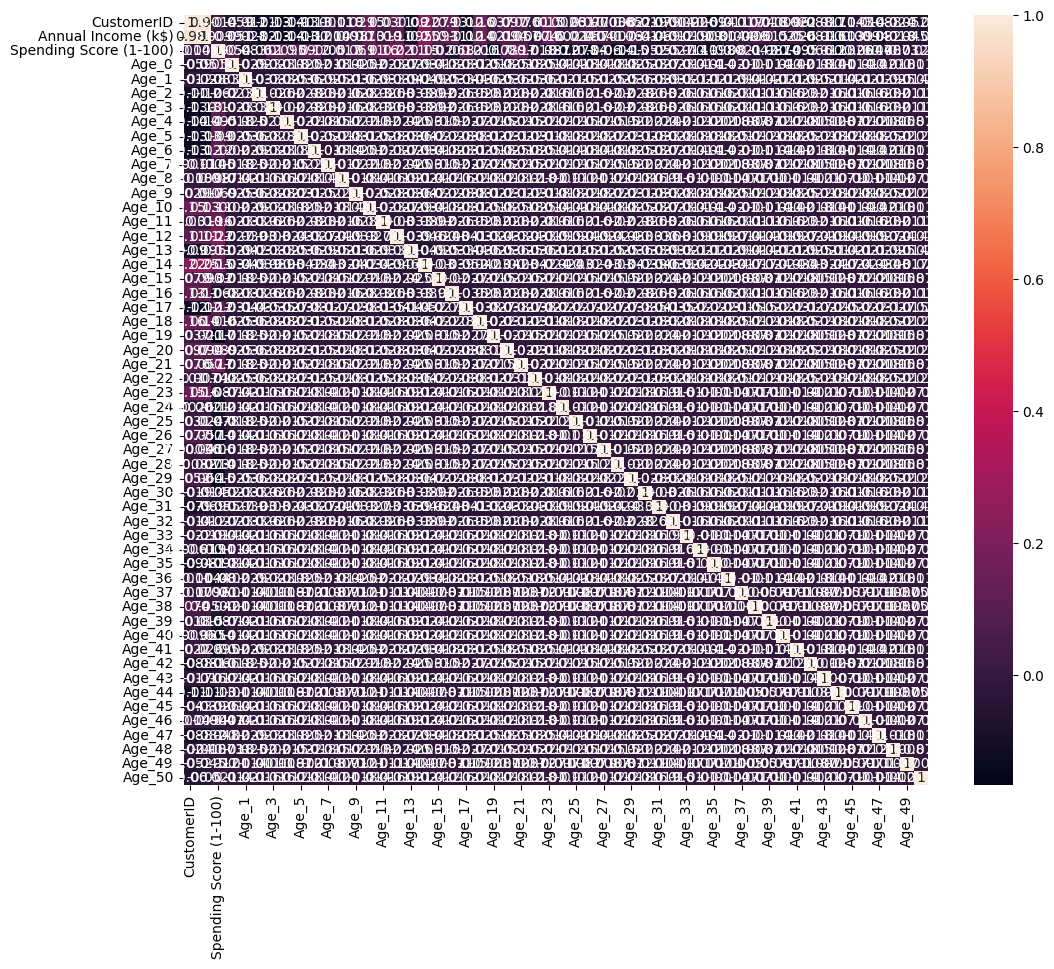

In [28]:
plt.figure(figsize=(12,10))
sns.heatmap(df_main.corr(),annot =True)

In [30]:
df_main.head()

,CustomerID,Gender,Annual Income (k$),Spending Score (1-100),Age_0,Age_1,Age_2,Age_3,Age_4,Age_5,...,Age_41,Age_42,Age_43,Age_44,Age_45,Age_46,Age_47,Age_48,Age_49,Age_50
0,1,Male,15,39,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Male,15,81,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Female,16,6,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Female,16,77,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,5,Female,17,40,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Using K-means

In [42]:
X1 = df[['Age' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X1)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


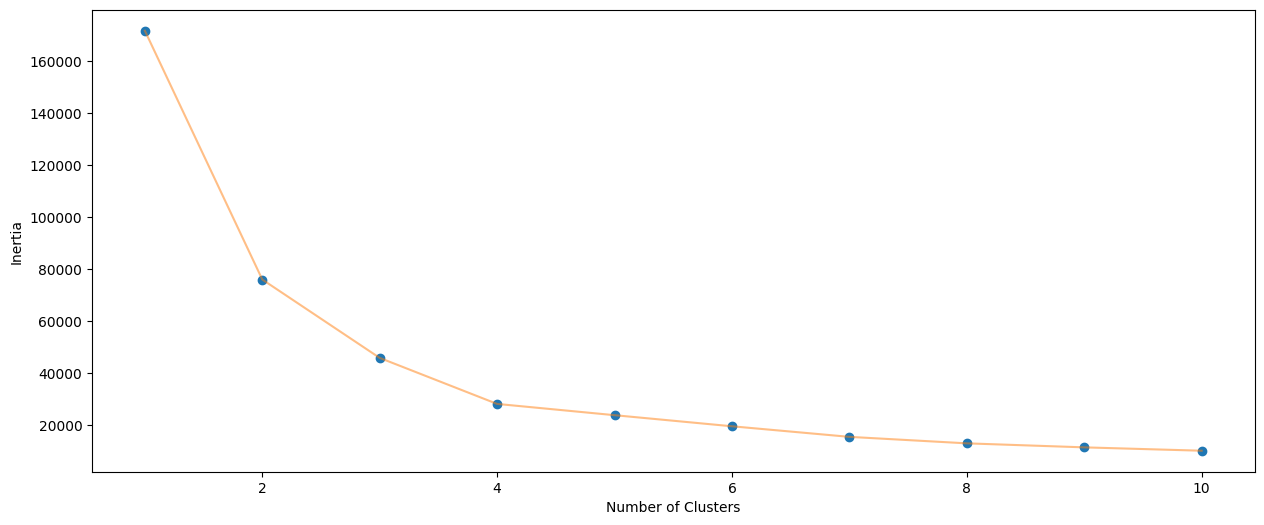

In [43]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [44]:
algorithm = (KMeans(n_clusters = 4 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X1)
labels1 = algorithm.labels_
centroids1 = algorithm.cluster_centers_

In [45]:
h = 0.02
x_min, x_max = X1[:, 0].min() - 1, X1[:, 0].max() + 1
y_min, y_max = X1[:, 1].min() - 1, X1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

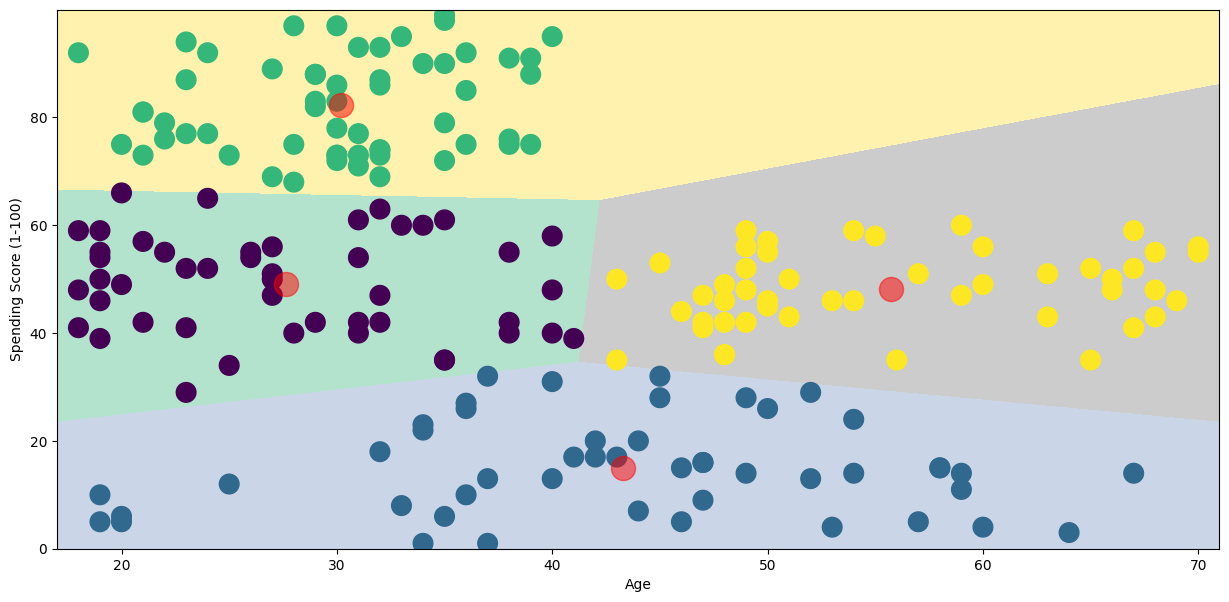

In [46]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z = Z.reshape(xx.shape)
plt.imshow(Z , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Age' ,y = 'Spending Score (1-100)' , data = df , c = labels1 ,
            s = 200 )
plt.scatter(x = centroids1[: , 0] , y =  centroids1[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Age')
plt.show()

In [47]:
X2 = df[['Annual Income (k$)' , 'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X2)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


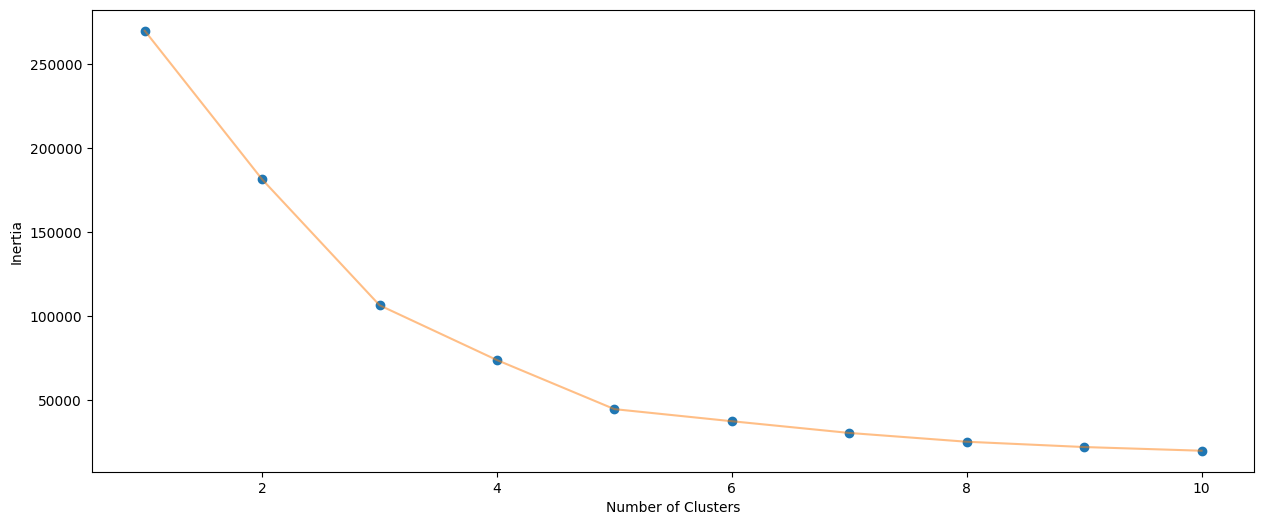

In [48]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [49]:
algorithm = (KMeans(n_clusters = 5 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X2)
labels2 = algorithm.labels_
centroids2 = algorithm.cluster_centers_

In [50]:
h = 0.02
x_min, x_max = X2[:, 0].min() - 1, X2[:, 0].max() + 1
y_min, y_max = X2[:, 1].min() - 1, X2[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z2 = algorithm.predict(np.c_[xx.ravel(), yy.ravel()])

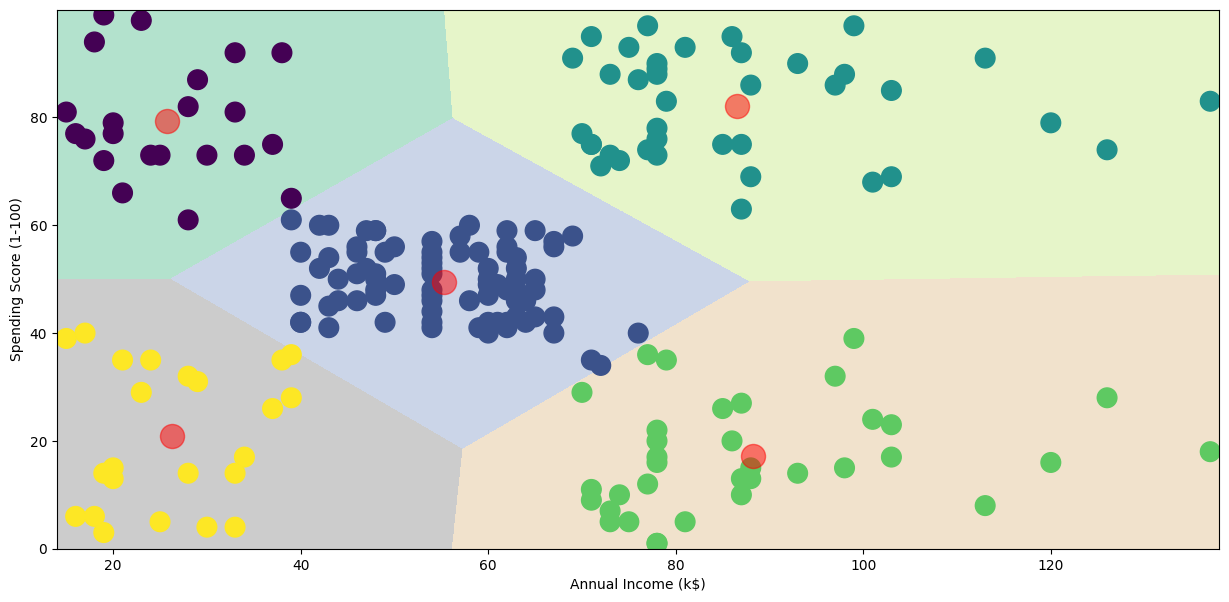

In [51]:
plt.figure(1 , figsize = (15 , 7) )
plt.clf()
Z2 = Z2.reshape(xx.shape)
plt.imshow(Z2 , interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap = plt.cm.Pastel2, aspect = 'auto', origin='lower')

plt.scatter( x = 'Annual Income (k$)' ,y = 'Spending Score (1-100)' , data = df , c = labels2 ,
            s = 200 )
plt.scatter(x = centroids2[: , 0] , y =  centroids2[: , 1] , s = 300 , c = 'red' , alpha = 0.5)
plt.ylabel('Spending Score (1-100)') , plt.xlabel('Annual Income (k$)')
plt.show()

In [52]:
X3 = df[['Age' , 'Annual Income (k$)' ,'Spending Score (1-100)']].iloc[: , :].values
inertia = []
for n in range(1 , 11):
    algorithm = (KMeans(n_clusters = n ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
    algorithm.fit(X3)
    inertia.append(algorithm.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1373: RuntimeWarning: algorithm='elkan' doesn't make sense for a single cluster. Using 'lloyd' instead.
  warnings.warn(


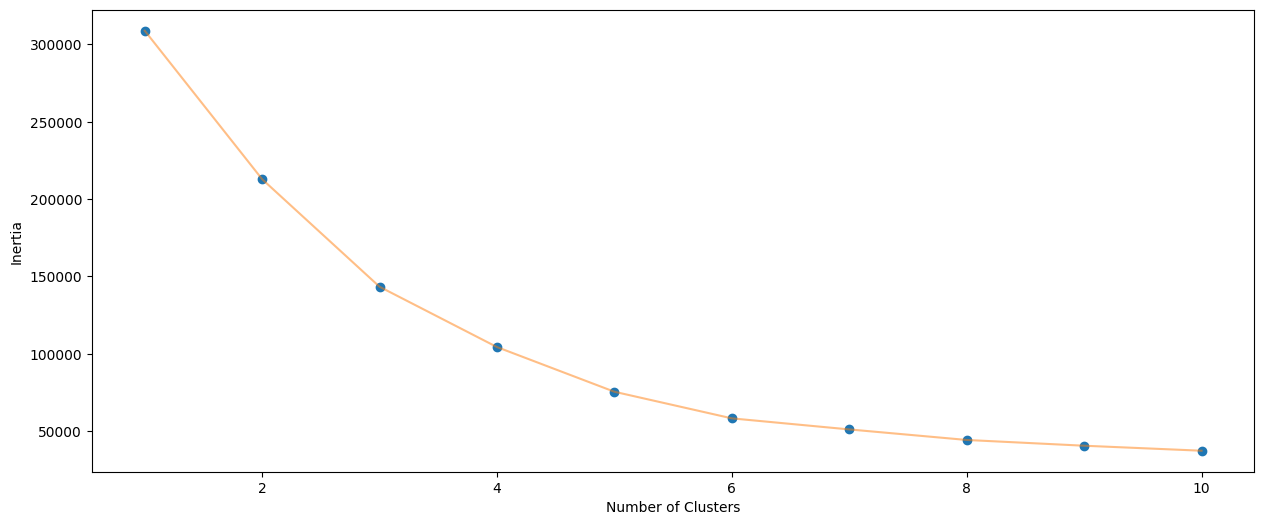

In [53]:
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , inertia , 'o')
plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
plt.show()

In [54]:
algorithm = (KMeans(n_clusters = 6 ,init='k-means++', n_init = 10 ,max_iter=300,
                        tol=0.0001,  random_state= 111  , algorithm='elkan') )
algorithm.fit(X3)
labels3 = algorithm.labels_
centroids3 = algorithm.cluster_centers_

In [55]:
df['label3'] =  labels3
trace1 = go.Scatter3d(
    x= df['Age'],
    y= df['Spending Score (1-100)'],
    z= df['Annual Income (k$)'],
    mode='markers',
     marker=dict(
        color = df['label3'],
        size= 20,
        line=dict(
            color= df['label3'],
            width= 12
        ),
        opacity=0.8
     )
)
data = [trace1]
layout = go.Layout(
#     margin=dict(
#         l=0,
#         r=0,
#         b=0,
#         t=0
#     )
    title= 'Clusters',
    scene = dict(
            xaxis = dict(title  = 'Age'),
            yaxis = dict(title  = 'Spending Score'),
            zaxis = dict(title  = 'Annual Income')
        )
)
fig = go.Figure(data=data, layout=layout)
py.offline.iplot(fig)